In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from typing import Dict
import tqdm
from icecream import ic
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

1) Download and visualize

In [2]:
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
Y = mushroom.data.targets 

df_mushroom = pd.DataFrame(X.join(Y))
CLASSES = list(df_mushroom['poisonous'].unique())
df_mushroom = df_mushroom.dropna()
df_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


<Axes: >

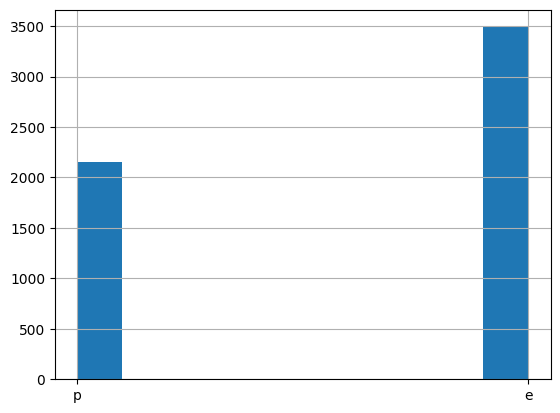

In [3]:
df_mushroom['poisonous'].hist()

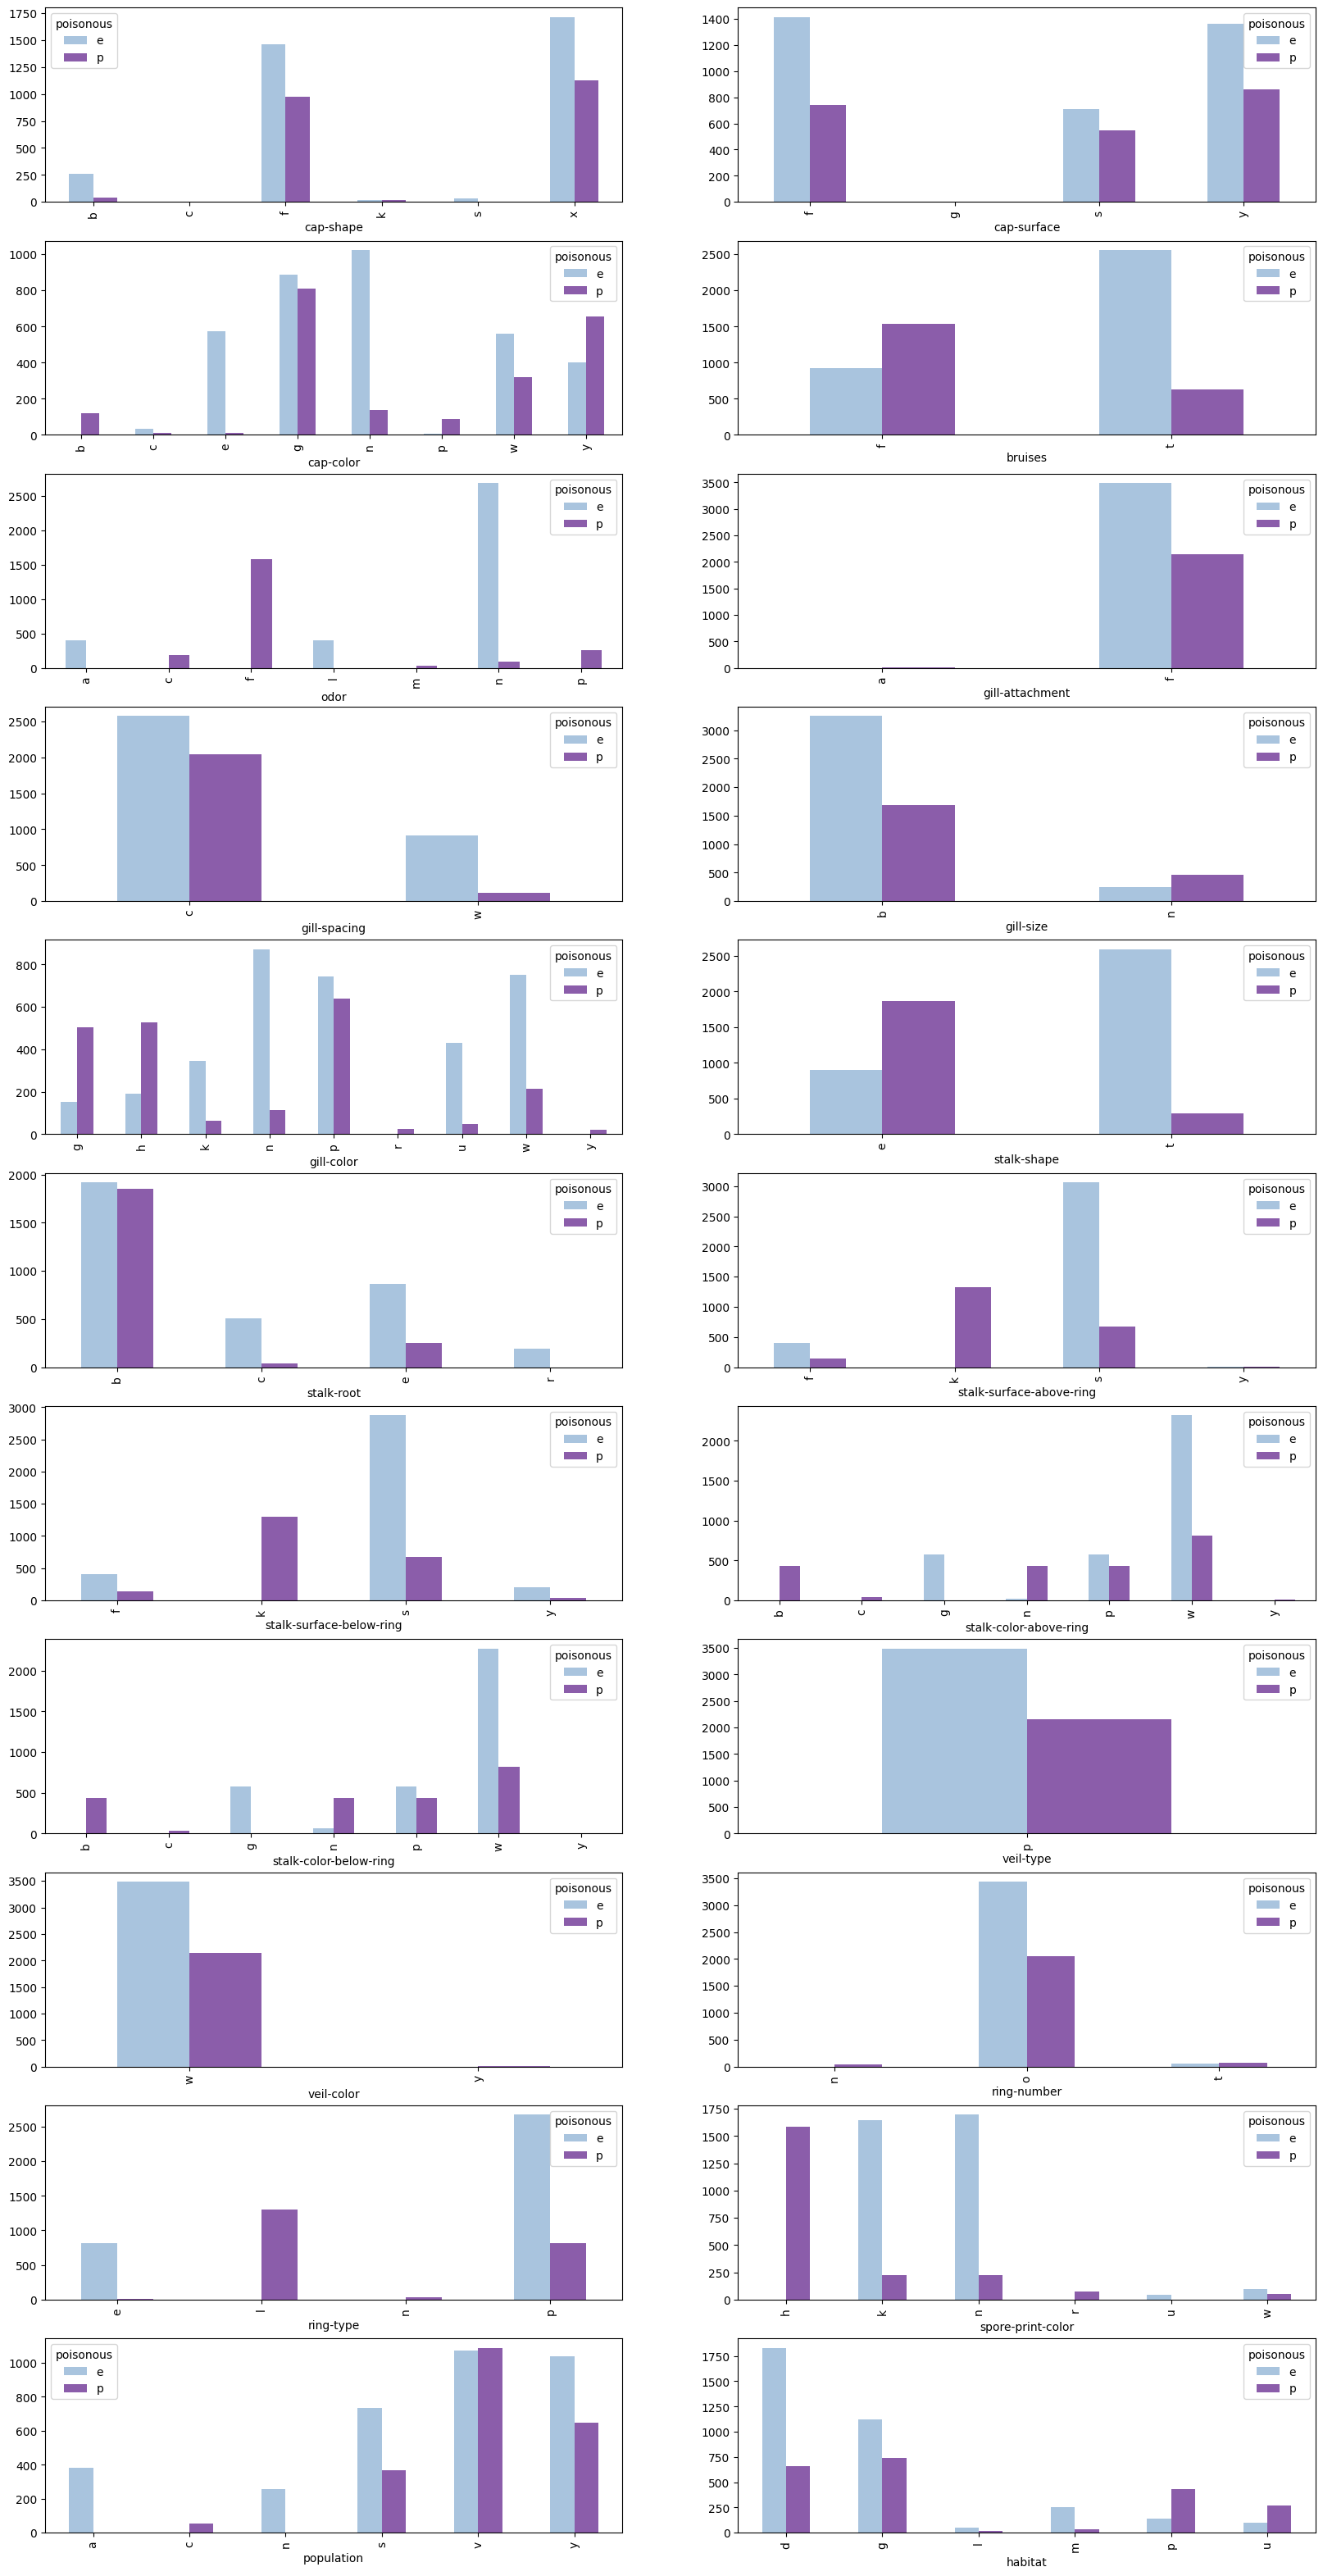

In [4]:
df_mushroom_f = pd.DataFrame()
columns = list(df_mushroom.drop('poisonous', axis = 1))
fig, axes = plt.subplots(11, 2, figsize=(20, 40))
for i, col in enumerate(columns):
    df_f = df_mushroom.groupby(col)['poisonous'].value_counts().unstack()
    df_f.plot.bar(ax=axes[i//2, i%2], color = sns.color_palette("BuPu", 2))
    df_f = df_f.rename(index=lambda x: df_f.index.name + '_' + x )
    df_mushroom_f =  pd.concat([df_mushroom_f, df_f])
plt.show()

<h4>Frequancy by LabelEncoder</h4>

In [5]:
df_mushroom_f.T.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
poisonous,,,,,,,,,,,,,,,,,,,,,
e,260.0,NaN,1460.0,20.0,32.0,1716.0,1416.0,NaN,712.0,1360.0,...,256.0,736.0,1072.0,1040.0,1832.0,1120.0,48.0,256.0,136.0,96.0
p,40.0,4.0,972.0,16.0,NaN,1124.0,744.0,4.0,548.0,860.0,...,NaN,368.0,1088.0,648.0,660.0,740.0,16.0,36.0,432.0,272.0


In [12]:
# Calculate frequncy for each class in table
def d_frequncy(x_feature, column_name, df) -> int:
    result_label = 0 # 1 for e and 0 for p
    with_same = df[df[column_name] == x_feature]
    if (len(with_same[with_same['poisonous'] == 'e']) > len(with_same[with_same['poisonous'] == 'p'])):
        result_label = 1
    return result_label
#
#                                               / - tp / fp
'''
def calculation_by_colymn(X, y, name_of_culmn) -> str:
    y_pred = 'e' # predicted var
    #for i in range(len(y)):
        
    return 0
'''

'''
n = len(df_mushroom)
colmn = df_mushroom.columns
y = df_mushroom['poisonous']
array_of_res = []
#y_pred = [0 for i in range(n)]
# calculate for each column( feature in cicle)
for name in columns: # in num of columns
    df_by_col = df_mushroom[name]
    y_pred = [d_frequncy(df_by_col[i], name, df_mushroom) for i in range(n)]
'''
dict_for_label = {'e' : 0, 'p' : 1}
rows = df_mushroom.shape[0]
Y = df_mushroom['poisonous'].map(dict_for_label)
acc = [[]]
predicted = []
dict_of_acc = {}
for i, col in enumerate(columns):
    y_pred = []
    for r in range(rows):
        value = str(col) + '_' + str(df_mushroom.iloc[r][col])
        y_pred.append(dict_for_label[(df_mushroom_f.T[value].idxmax())])
    acc[0].append(metrics.accuracy_score(Y, y_pred))
    predicted.append(y_pred)
    print(col + ': '+ str('%.3f' % (acc[0][i] * 100)))
    dict_of_acc[col] = str('%.3f' % (acc[0][i] * 100))

    

cap-shape: 61.871
cap-surface: 61.871
cap-color: 69.880
bruises: 72.502
odor: 98.441
gill-attachment: 62.119
gill-spacing: 61.800
gill-size: 65.769
gill-color: 74.805
stalk-shape: 79.022
stalk-root: 61.800
stalk-surface-above-ring: 85.400
stalk-surface-below-ring: 84.763
stalk-color-above-ring: 77.605
stalk-color-below-ring: 76.754
veil-type: 61.800
veil-color: 61.942
ring-number: 62.863
ring-type: 85.400
spore-print-color: 91.141
population: 63.005
habitat: 70.163


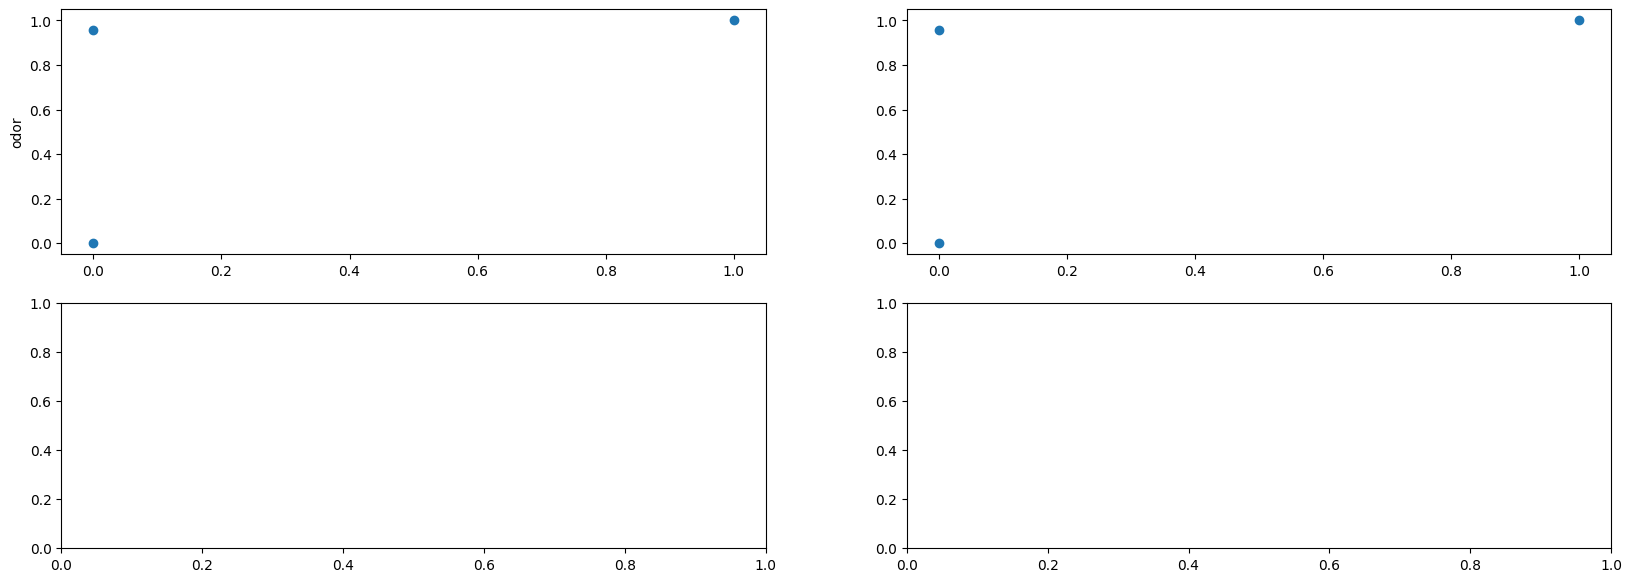

In [25]:
# Roc / PR curve for some of columns
arr_of_columns = ['odor']

fig, axs = plt.subplots(len(arr_of_columns) + 1, 2, figsize=(20, 7 * len(arr_of_columns)), squeeze=False)
row_in_f = 0
for index, name in enumerate(df_mushroom.columns):
    if name in arr_of_columns:
        
        # Roc curve
        fpr, tpr, _ = metrics.roc_curve(Y, predicted[index])
        auc = metrics.roc_auc_score(Y, predicted[index])
        axs[row_in_f][0].scatter(fpr, tpr)
        axs[row_in_f][0].set_ylabel(arr_of_columns[row_in_f])
        axs[row_in_f][0].set_label(" AUC= "+str(auc))

        # PR curve
        fpr, tpr, _ = metrics.roc_curve(Y, predicted[index])
        auc = metrics.roc_auc_score(Y, predicted[index])
        axs[row_in_f][1].scatter(fpr, tpr)
        axs[row_in_f][1].set_label(" AUC= "+str(auc))
plt.show()

In [ ]:
print(df_mushroom.dtypes)

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
dtype: object


<h4>Same thing for OneHot Encoder</h4>

In [ ]:
# It's not the right way
print(df_mushroom.shape)

df_copy = pd.DataFrame(df_mushroom)

def dict_by_column(column: np.ndarray) -> dict:
    n = len(column)
    dictr = {}
    for item in range(n):
        dictr[column[item]] = item
    print(dictr)
    return dictr

def change_columns(df) -> pd.DataFrame:
    col = df.columns
    for name in col:
        dict_for = dict_by_column(df[name].unique())
        df[name] = df[name].map(dict_for)
    return df

df_mushroom = change_columns(df_mushroom)

df_mushroom = df_mushroom.drop(columns='veil-type')

print(df_mushroom.head(15))

print(df_mushroom.shape)

df_mushroom.corr()

(5644, 23)
{'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}
{'s': 0, 'y': 1, 'f': 2, 'g': 3}
{'n': 0, 'y': 1, 'w': 2, 'g': 3, 'e': 4, 'p': 5, 'b': 6, 'c': 7}
{'t': 0, 'f': 1}
{'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'm': 6}
{'f': 0, 'a': 1}
{'c': 0, 'w': 1}
{'n': 0, 'b': 1}
{'k': 0, 'n': 1, 'g': 2, 'p': 3, 'w': 4, 'h': 5, 'u': 6, 'r': 7, 'y': 8}
{'e': 0, 't': 1}
{'e': 0, 'c': 1, 'b': 2, 'r': 3}
{'s': 0, 'f': 1, 'k': 2, 'y': 3}
{'s': 0, 'f': 1, 'y': 2, 'k': 3}
{'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'c': 5, 'y': 6}
{'w': 0, 'p': 1, 'g': 2, 'b': 3, 'n': 4, 'c': 5, 'y': 6}
{'p': 0}
{'w': 0, 'y': 1}
{'o': 0, 't': 1, 'n': 2}
{'p': 0, 'e': 1, 'l': 2, 'n': 3}
{'k': 0, 'n': 1, 'u': 2, 'h': 3, 'r': 4, 'w': 5}
{'s': 0, 'n': 1, 'a': 2, 'v': 3, 'y': 4, 'c': 5}
{'u': 0, 'g': 1, 'm': 2, 'd': 3, 'p': 4, 'l': 5}
{'p': 0, 'e': 1}
    cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment   
0           0            0          0        0     0                0  \
1           0       

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,0.061266,0.006390,0.024314,0.031966,0.036518,0.012686,0.045297,0.060692,0.079150,...,0.066042,0.081847,0.094223,0.047866,0.071161,0.076913,0.103736,0.128877,0.030009,-0.012738
cap-surface,0.061266,1.000000,-0.018024,0.170464,0.231799,-0.011919,-0.079934,0.079547,0.078234,0.052305,...,0.184989,0.311082,0.294905,-0.007939,-0.098754,0.204256,0.001669,0.387680,0.328787,0.068231
cap-color,0.006390,-0.018024,1.000000,-0.037622,0.289324,0.057650,-0.058742,0.031560,0.141792,0.116227,...,-0.073184,0.019587,0.042405,-0.026314,0.158058,-0.041243,0.166598,0.099936,0.085354,-0.121709
bruises,0.024314,0.170464,-0.037622,1.000000,0.559444,0.064351,0.439183,-0.040178,-0.036862,-0.348294,...,0.643622,0.416310,0.382574,0.042863,0.007218,0.830229,0.409097,0.007056,-0.061334,-0.435562
odor,0.031966,0.231799,0.289324,0.559444,1.000000,0.151638,0.011745,0.261129,0.264612,0.028335,...,0.454124,0.502011,0.451342,-0.000648,0.158408,0.530517,0.492609,0.353483,0.280530,-0.415438
gill-attachment,0.036518,-0.011919,0.057650,0.064351,0.151638,1.000000,-0.026630,0.021353,0.095599,-0.057738,...,0.050650,0.163367,0.164673,-0.002131,0.520652,0.157052,0.150416,0.093391,0.036296,-0.071945
gill-spacing,0.012686,-0.079934,-0.058742,0.439183,0.011745,-0.026630,1.000000,-0.178484,-0.148132,0.314060,...,-0.173242,-0.342702,-0.264082,0.080026,-0.074985,0.099214,-0.175159,-0.378184,-0.228317,0.264160
gill-size,0.045297,0.079547,0.031560,-0.040178,0.261129,0.021353,-0.178484,1.000000,0.115416,0.282368,...,0.246351,0.268924,0.182452,-0.099801,0.060127,0.240390,0.093165,0.105979,0.109261,0.215289
gill-color,0.060692,0.078234,0.141792,-0.036862,0.264612,0.095599,-0.148132,0.115416,1.000000,0.088911,...,0.093794,0.197613,0.202523,0.063676,0.167014,0.065731,0.221718,0.257183,0.212575,-0.129357
stalk-shape,0.079150,0.052305,0.116227,-0.348294,0.028335,-0.057738,0.314060,0.282368,0.088911,1.000000,...,-0.563249,-0.330838,-0.300655,-0.038458,-0.162582,-0.426768,-0.448541,0.031050,-0.000168,0.592446


<Axes: >

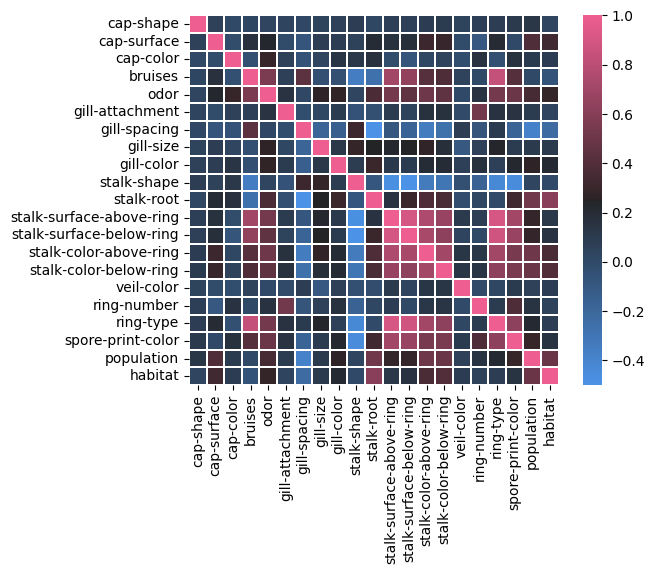

In [ ]:
# check of independense

# Lets build something to visualise undepandance od data features
corr = df_mushroom.iloc[:,:-1].corr(method='pearson')
cmap = sns.diverging_palette(250, 354, 80, 60, center = 'dark', as_cmap = True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
# ind is okay so now we are gonna fit and check model
y = df_mushroom['poisonous']
X = df_mushroom.drop(columns='poisonous')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GaussianNB()
y_pred = model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[ 436  261]
 [  20 1146]]


In [ ]:
metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')


the metric acc = 0.8491680085882984
the metric prec = 0.814498933901919
the metric rec = 0.9828473413379074
the metric f1 = 0.8907889623008162


With LabelEncoder

In [ ]:
# Another way is use "LabelEncoder"
df_mushroom = df_copy

labelencoder=LabelEncoder()

df_mushroom['poisonous'] = labelencoder.fit_transform(df_mushroom['poisonous'])
df_mushroom = df_mushroom.rename(columns={'poisonous':'target'})

X = pd.get_dummies(df_mushroom.drop(['target'], axis=1))
y = labelencoder.fit_transform(df_mushroom['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8001,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8038,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8095,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
model = GaussianNB()
y_pred = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')


[[1162    4]
 [   0  697]]
the metric acc = 0.9978529253891573
the metric prec = 0.9942938659058488
the metric rec = 1.0
the metric f1 = 0.9971387696709586


My own bias

In [ ]:
from my_naive_bias import Naive_Bayes

In [ ]:
model = Naive_Bayes()
data = pd.read_csv("./data/mushrooms.csv")

xs = data.drop('class', axis=1)
ys = data['class']

xs = pd.get_dummies(xs)

X_train, X_test, y_train, y_test = train_test_split(xs.values, ys, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#print(classification_report(y_test, y_pred))

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
#metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
#metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
#metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')

[[838   5]
 [ 12 770]]
the metric acc = 0.9895384615384616


In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.special import logit


# Создание и обучение модели
model = CategoricalNB()
model.fit(X_train, y_train)

# Получим оценки вероятностей принадлежности к классам
probabilities = model.predict_proba(X_train)[:, 1]

# epsilon для избежания бесконечностей после логит-функции
eps = 1e-15
probabilities = probabilities.clip(eps, 1 - eps)
transformed_probabilities = logit(probabilities)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(transformed_probabilities.reshape(-1, 1), y_train)

# Предсказание на тестовых данных
test_probabilities = model.predict_proba(X_test)[:, 1]
test_probabilities = test_probabilities.clip(eps, 1 - eps)
transformed_test_probabilities = logit(test_probabilities)
y_pred = logreg.predict(transformed_test_probabilities.reshape(-1, 1))

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"model acc: {accuracy*100:3.1f}%")

'''
# Results with regression
cm = confusion_matrix(y_test, y_pred) 

  
print("Confusion Matrix:") 
print(cm) 

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
'''

model acc: 96.8%


'\n# Results with regression\ncm = confusion_matrix(y_test, y_pred) \n\n  \nprint("Confusion Matrix:") \nprint(cm) \n\nfpr, tpr, threshold = roc_curve(y_test, y_pred)\nroc_auc = auc(fpr, tpr)\n\nplt.title(\'Receiver Operating Characteristic\')\nplt.plot(fpr, tpr, \'b\', label = \'AUC = %0.2f\' % roc_auc)\nplt.legend(loc = \'lower right\')\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0, 1])\nplt.ylim([0, 1])\nplt.ylabel(\'True Positive Rate\')\nplt.xlabel(\'False Positive Rate\')\nplt.show()\n'